In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
A=pd.read_csv('two_link_A.csv')
As=pd.read_csv('two_link_A-2.csv')
b=pd.read_csv('two_link_b.csv')

# A - collection of parameters (weight, something else)
# b - the vector of rotational moments

In [6]:
As.describe()

,0,1,2,3,4,5,6
count,20002.000000,20002.000000,20002.000000,20002.000000,20002.000000,20002.000000,20002.000000
mean,0.346212,0.097677,0.218518,0.128412,33.461021,0.071933,0.179960
std,4.687905,5.100451,12.247300,4.004647,94.476929,88.328586,19.494185
min,-9.810000,-9.810000,-42.233346,-16.181060,-291.317962,-307.066928,-55.579911
25%,0.000000,0.000000,0.000000,0.000000,-4.006855,-25.359302,-7.449285
50%,0.000000,0.000000,0.000000,0.000000,8.650258,-0.639911,0.148104
75%,0.892627,0.352691,2.062790,0.210923,58.556748,28.619115,8.029276
max,9.810000,9.809999,47.512915,15.416685,433.449293,329.207732,50.276099


In [27]:
As.drop(As.columns[[0,2,4,5,7,8,9,12,14,15,17,18,19]], axis=1, inplace=True)
Asb = pd.concat([As, b], axis=1, join='inner')
Asb
# deleted bc of zeroes

,1,3,6,10,11,13,16,b
0,0.000234,-9.810000,6.002901,-3.656041,0.000200,-5.768306,1.026133,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000190,-6.358332,1.026133,0.000000
2,0.000705,-9.810000,6.002901,-3.656041,0.000681,-5.768306,1.026133,0.060000
3,0.000000,0.000000,0.000000,0.000000,0.000655,-6.358332,1.026133,0.020000
4,0.001411,-9.810000,6.029937,-3.647102,0.001450,-5.742971,1.043157,0.120000
...,...,...,...,...,...,...,...,...
19997,0.000000,0.000000,0.000000,0.000000,23.327060,48.402461,1.230696,9.113056
19998,9.807943,-0.200864,13.731070,4.424339,19.095859,42.719458,1.228516,27.363818
19999,0.000000,0.000000,0.000000,0.000000,23.884749,48.456810,1.228516,9.121273
20000,9.809956,-0.029368,13.632738,4.490437,19.592631,42.804062,1.227989,27.388358


### Visual analysis

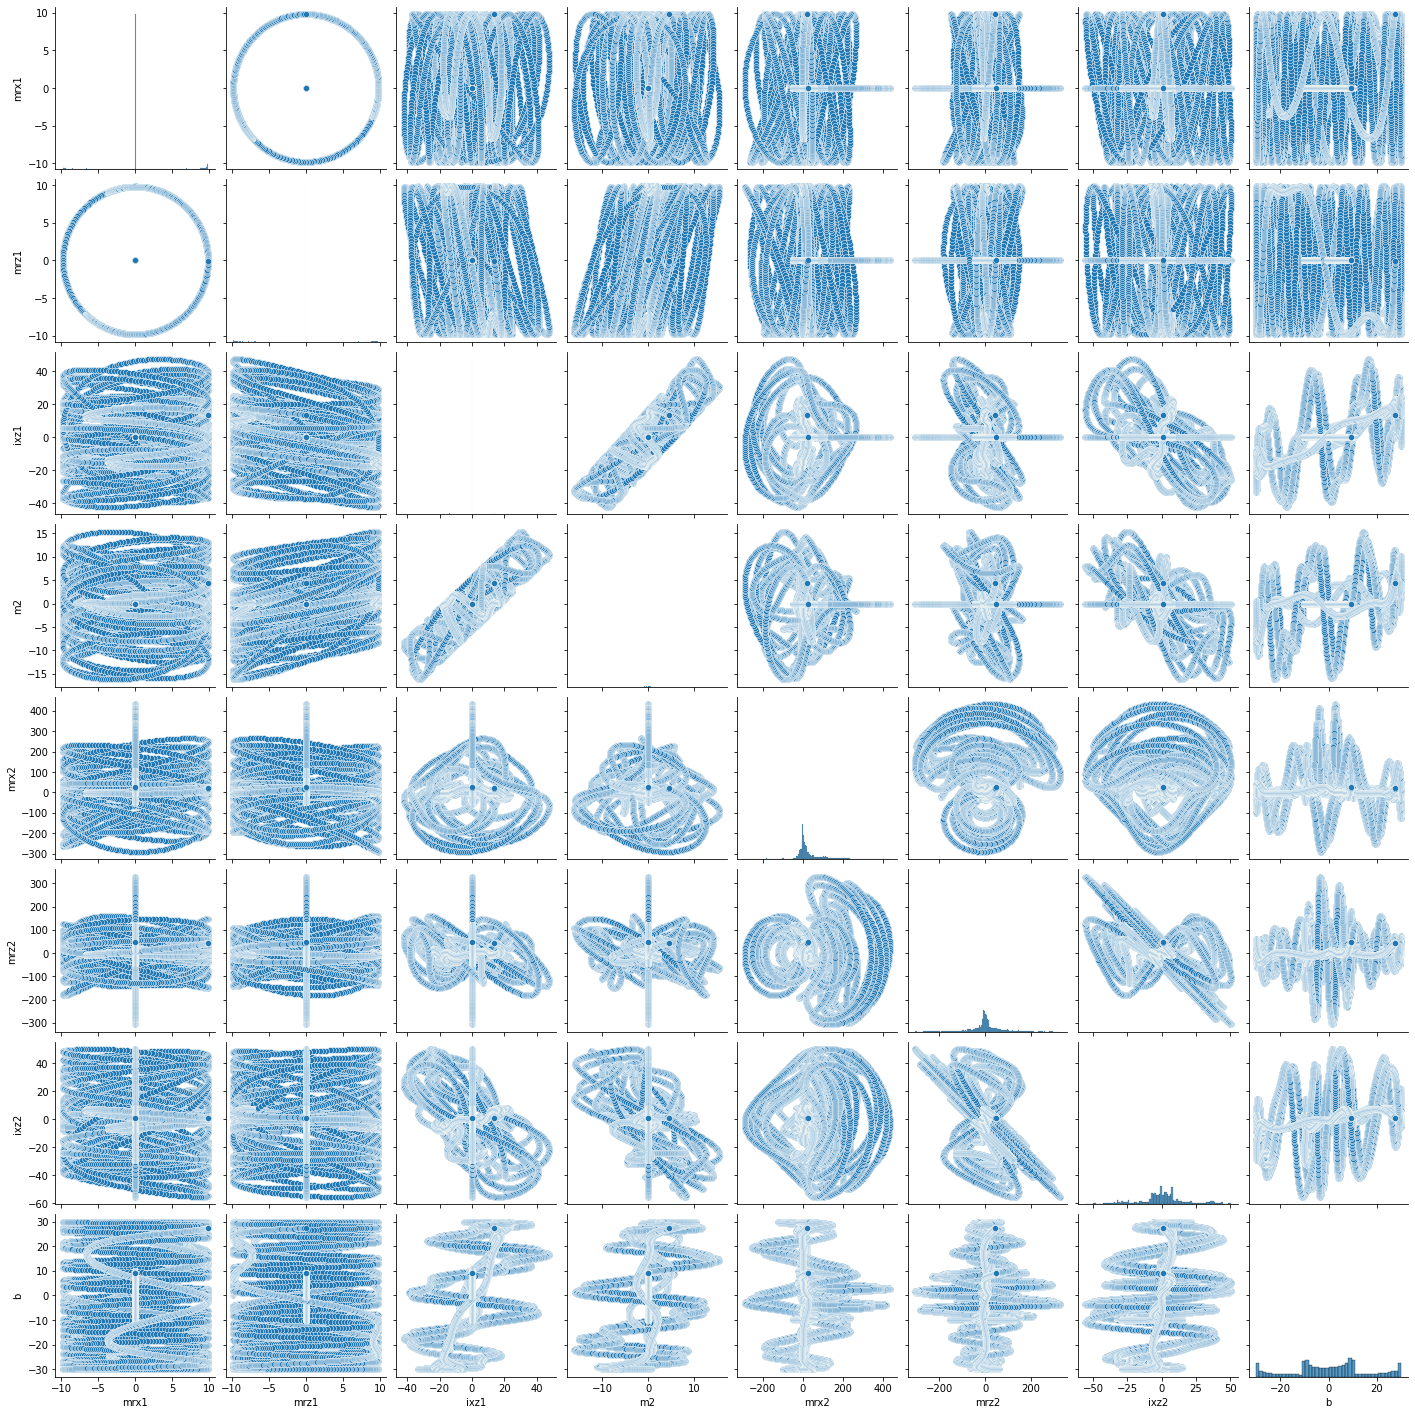

In [9]:
sns.pairplot(Abs)

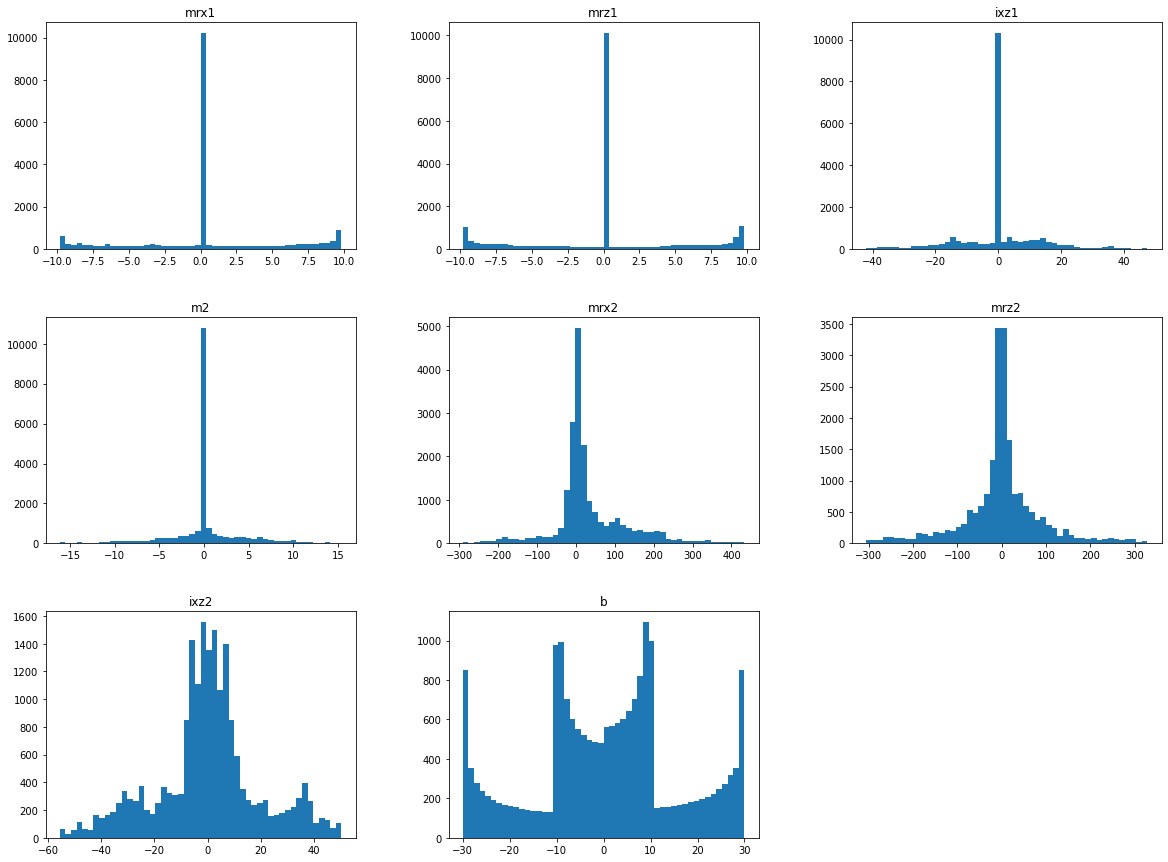

In [10]:
Abs.hist(grid=False, bins=50, figsize=(20,15))
plt.show()

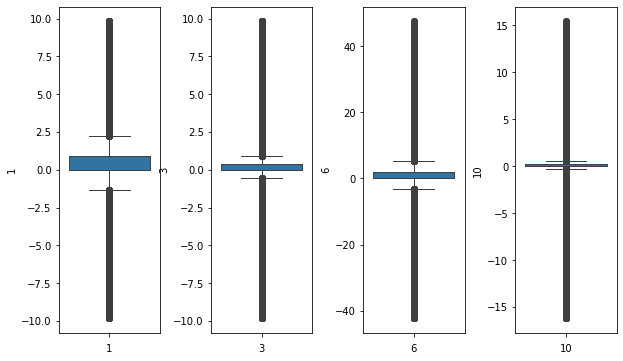

In [34]:
fig, ax = plt.subplots(1, 4, figsize=(10, 6))

plt.subplots_adjust(wspace=0.5) 

sns.boxplot(data=Asb['1'], ax=ax[0])
ax[0].set_xlabel('1')

sns.boxplot(data=Asb['3'], ax=ax[1])
ax[1].set_xlabel('3')

sns.boxplot(data=Asb['6'], ax=ax[2])
ax[2].set_xlabel('6')

sns.boxplot(data=Asb['10'], ax=ax[3])
ax[3].set_xlabel('10')

for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

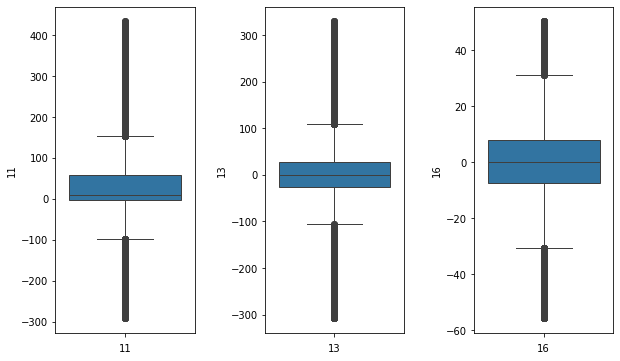

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

plt.subplots_adjust(wspace=0.5) 

sns.boxplot(data=Asb['11'], ax=ax[0])
ax[0].set_xlabel('11')

sns.boxplot(data=Asb['13'], ax=ax[1])
ax[1].set_xlabel('13')

sns.boxplot(data=Asb['16'], ax=ax[2])
ax[2].set_xlabel('16')

for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

### Multicollinearity

<Axes: >

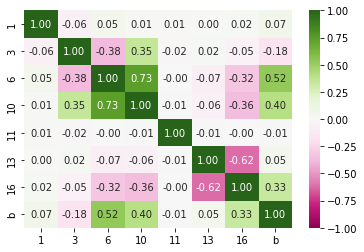

In [28]:
sns.heatmap(Asb.corr(), cmap="PiYG", annot=True, fmt='.2f', vmin=-1, vmax=1)

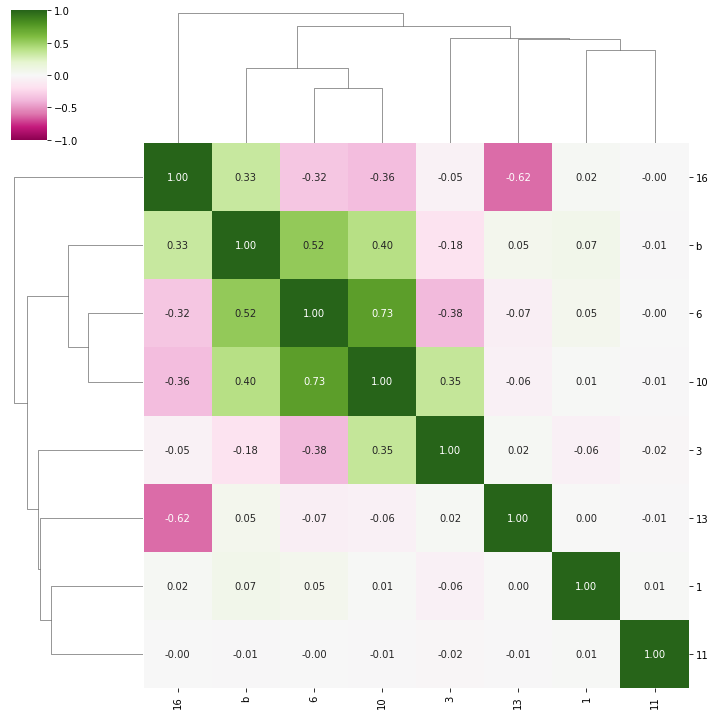

In [32]:
corr_Abs = Asb.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix
fig = sns.clustermap(corr_Abs,
               row_cluster=True,
               col_cluster=True,
               figsize=(10, 10),
               cmap="PiYG", annot=True, fmt='.2f', vmin=-1, vmax=1);

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90);
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0);

In [43]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = As.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(As.values, i) 
                          for i in range(len(As.columns))]   
print(vif_data)

  feature       VIF
0       1  1.009190
1       3       inf
2       6       inf
3      10       inf
4      11  1.001694
5      13  1.970909
6      16  2.280222


/home/jupyter-sakotlyarova@edu.h-b50b5/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


vif more than 5-10 is not desirable. vif inf may be caused by deriving one feature from others. vif's nature is the coeff based on regressions built where dependent variable is one ind var, and independent variables are all others.

In [44]:
As_reduced2 = As.drop(Asb.columns[[1,2,3]], axis=1)
As_reduced2

,1,11,13,16
0,0.000234,0.000200,-5.768306,1.026133
1,0.000000,0.000190,-6.358332,1.026133
2,0.000705,0.000681,-5.768306,1.026133
3,0.000000,0.000655,-6.358332,1.026133
4,0.001411,0.001450,-5.742971,1.043157
...,...,...,...,...
19997,0.000000,23.327060,48.402461,1.230696
19998,9.807943,19.095859,42.719458,1.228516
19999,0.000000,23.884749,48.456810,1.228516
20000,9.809956,19.592631,42.804062,1.227989


In [45]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = As_reduced2.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(As_reduced2.values, i) 
                          for i in range(len(As_reduced2.columns))]   
print(vif_data)

  feature       VIF
0       1  1.002559
1      11  1.001597
2      13  1.635617
3      16  1.636262


Adequate vifs

### Regression model 1

In [46]:
X = As_reduced2
y = b

model2 = sm.OLS(y, X)
results2 = model2.fit(cov_type='HC1')
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      b   R-squared (uncentered):                   0.219
Model:                            OLS   Adj. R-squared (uncentered):              0.219
Method:                 Least Squares   F-statistic:                              913.1
Date:                Tue, 12 Mar 2024   Prob (F-statistic):                        0.00
Time:                        14:09:45   Log-Likelihood:                         -80940.
No. Observations:               20002   AIC:                                  1.619e+05
Df Residuals:                   19998   BIC:                                  1.619e+05
Df Model:                           4                                                  
Covariance Type:                  HC1                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model1 = sm.OLS(y_train, X_train)
results1 = model1.fit()
results1.params

1     0.189255
11   -0.000080
13    0.073558
16    0.475362
dtype: float64

### Коэффициенты "настоящие" 

0,
0.3,
1.09,
1,
0,
0.1625,
1.0264


In [17]:
### turned out dataset is a collection of observations of the same object throughout time aka time series

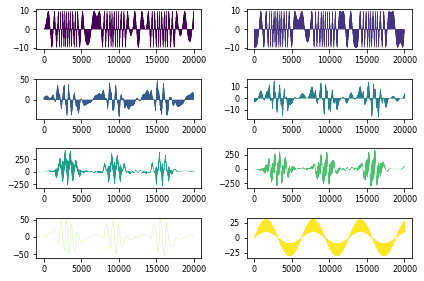

In [18]:
Ab.plot(subplots=True,
          layout=(4, 2),
          sharex=False,
          sharey=False,
          colormap='viridis',
         fontsize=8,
         legend=False,
         linewidth=0.2);
plt.tight_layout();

In [19]:
### From scratch